# Birthday paradox

**Problem 1a.** During exercise session, we showed that for $d$ equally likely dates in a year and $n$ people, the probability of a repeat date is $p(n)=1-\frac{d^\underline{n}}{d^n}$. We also derived a simple approximate formula for this probability: $p_a(n) = 1-e^{-\frac{n(n-1)}{2d}}$. In particular, this approximation implies that for $d=365$ dates, $p(n)$ is close to $\frac{1}{2}$ for $n=23$.

Verify how good the approximation is. To this end, write a program that computes the exact value of $p(n)$ as well as the value of the approximation $p_a(n)$ for $d=365$ and $n=1,\ldots,60$. Plot the graphs of the two functions.

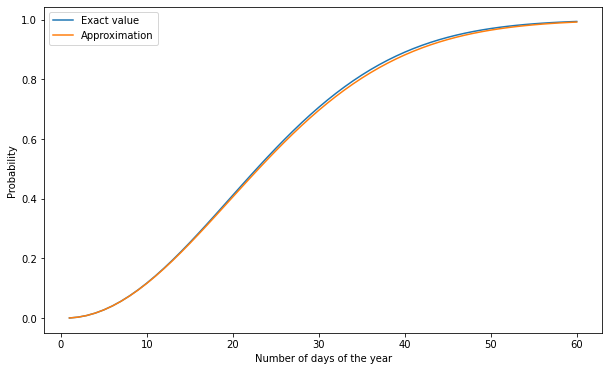

In [2]:
import numpy as np
import matplotlib.pyplot as plt
d = 365
def p(n):
    f = 1
    for i in range(n):
        f *= (d - i)/d
    return 1 - f
def pa(n):
    return 1 - np.exp(-n * (n-1) / (2 * d))
x = np.arange(1,61)
y = np.array([p(i) for i in x])
ya = np.array([pa(i) for i in x])
plt.figure(figsize = (10, 6))
plt.plot(x, y)
plt.plot(x, ya)
plt.xlabel("Number of days of the year")
plt.ylabel("Probability")
plt.legend(["Exact value", "Approximation"])

**Problem 1b.**
Implement a function, that chooses random dates out of $1,\ldots,d$ until a repeat occurs. The function should return the number of the step in which that happened. Run the function $N=100\,000$ times.
    * Plot a histogram of the return values.
    * Which return value seems most likely?
    * What is the average of the return values?
    * Is there any simple relation between these two numbers and the value $23$ in the previous problem?
    * Is there any simple relation between the histogram obtained, and the plot in the previous problem?

19
23.64988


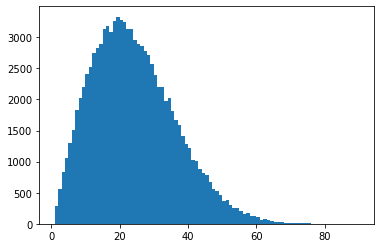

In [3]:
def rand():
    count = 0
    cash = np.full((d,), False)
    while True:
        a = np.random.randint(d)
        if cash[a]:
            return count
        cash[a] = True
        count +=1
x = np.array([rand() for i in range(100000)])
plt.hist(x, bins=np.arange(1, np.max(x) + 1))
val,freq = np.unique(x, return_counts=True)
index_max = np.argmax(freq)
print(val[index_max])
print(np.mean(x))

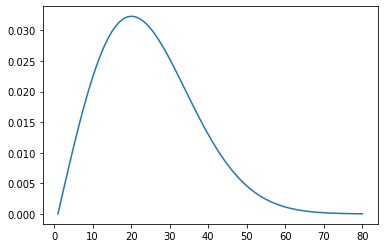

In [4]:
def der(n):
    return p(n) - p(n-1)
x = np.arange(1,81)
y = np.array([der(i) for i in x])
plt.plot(x, y)

**Problem 1c.** Here we investigate how our analysis using the classical approach compares to a more empirical one. The file *us_births_69_88.csv* contains the counts for birthdates from 1969 to 1988. Only those births, for which the full date is known, are included in the file.
    * Read the file.
    * Investigate the data. Do you notice anything strange?
    * Plot a heatmap of the data. Do you notice any significant deviations from the uniform assumption? Can you explain them?
    * Implement a sampling function as in 1b, but this time using the supplied data. Compare the results.

<AxesSubplot:xlabel='day', ylabel='month'>

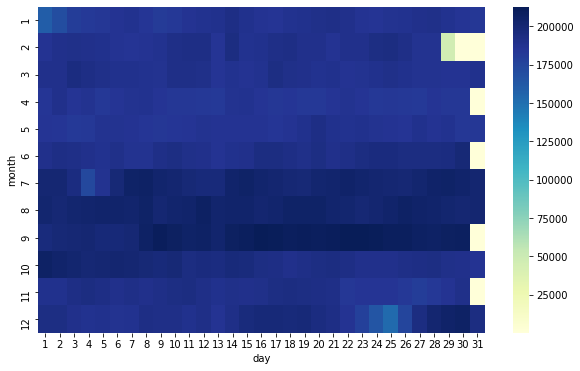

In [5]:
import pandas as pd
data = pd.read_csv('us_births_69_88.csv', names=['month', 'day', 'births'],
                skiprows=1)
import seaborn as sns
heatmap_data = pd.pivot_table(data, values='births',
                     index=['month'],
                     columns='day')
plt.figure(figsize = (10, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu")

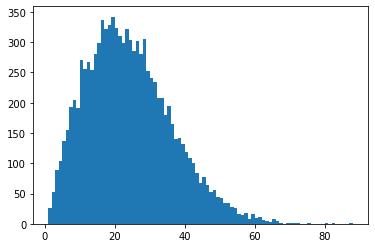

In [20]:
newData = np.loadtxt('us_births_69_88.csv', skiprows=1, delimiter=',', dtype=np.int64)
birth = 0
for i in range (372):
    birth += newData[i,2]

def choose():
    result = 0
    temp = newData[0, 2]
    a = np.random.randint(birth)
    while a > temp:
        result += 1
        temp += newData[result, 2]
    return result

def foo():
    count = 0
    cash = np.full((372,), False)
    while True:
        a = choose()
        if cash[a]:
            return count
        cash[a] = True
        count += 1
x = np.array([foo() for i in range(10000)])
plt.hist(x, bins=np.arange(1, np.max(x) + 1));